# TIDES exercise solutions for Module 2, completed by Alex Chartrand

<u>**Exercise #1**</u>  
Consider the function $f(n) = n^{0.1}$.  (a) Plot it and $\log_{10}(n)$ (available in `numpy` as `log10`) on the same graph over the range $n = 0 \rightarrow 50$.  What does the graph suggest about which function is greater for large $n$?  (b) There is a second crossing at a *much* larger value of $n$, beyond which $n^{0.1} > \log_{10} n$.  At what very large value of $n$ does $n^{0.1}$ equal $\log_{10}(n)$?  Demonstrate your conclusion analytically (you may need a trial-and-error approach -- think powers of 10), and replot the two functions on the same graph over a suitable range of $n$ to confirm your answer.  *Python reminders*: (1) The plot command in `matplotlib` has the syntax `plot(xvalues, yvalues, decorators)`, where "`decorators`" refers to features like marker and line color, marker and line type, legend label, etc.).  (2) To run `matplotlib` inside an IPython notebook, the first code cell executed should contain the lines 

<code>
%matplotlib inline
from matplotlib.pyplot import *
</code>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family = 'serif', size=14)

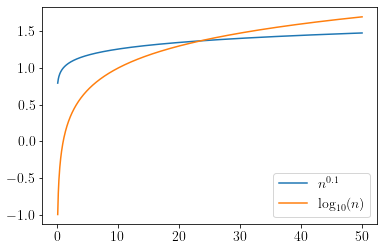

In [3]:
n = np.linspace(0.1, 50, 2**10)
f1 = n**0.1
f2 = np.log10(n)

plt.plot(n, f1, '-', n, f2, '-')
plt.legend(['$n^{0.1}$', '$\\log_{10}(n)$']);

At what large number does $n^{0.1} = \log_{10}(n)$? We can rephrase the question as, "get the number that is equal to the number of zeros it contains after it is multiplied by itself ten times." The answer is, then, $10^{10}$, a number with 10 zeros after the one which is also 10 multiplied 10 times. In fact, for any equation $n^{1/x} = \log_{x}(n)$, one of the solutions is $x$. The graph below shows this visually.

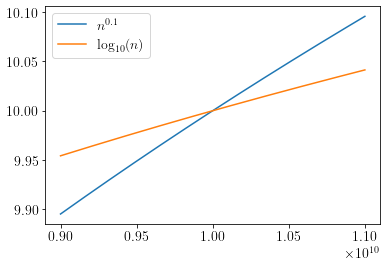

In [4]:
large_n = np.linspace(9e9, 11e9, 2**10)
f1 = large_n**0.1
f2 = np.log10(large_n)
plt.plot(large_n, f1, '-', large_n, f2, '-')
plt.legend(['$n^{0.1}$', '$\log_{10}(n)$']);

<u>**Exercise #2**</u>  
Plot the functions $f_1(n) = \log_{10}(n)$, $f_2(n) = n$, and $f_3(n) = n \log_{10}(n)$ on the same graph (in different colors) over the range $n = 0 \rightarrow 100$ and include a legend.  Briefly comment on their growth rates for larger $n$.  

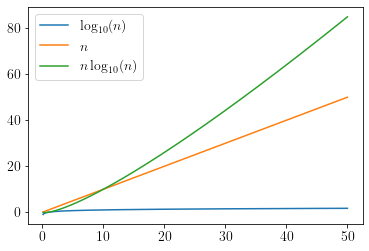

In [5]:
n = np.linspace(0.1, 50, 2**10)
f1 = np.log10(n)
f2 = n
f3 = n * np.log10(n)

plt.plot(n, f1, '-', n, f2, '-', n, f3, '-')
plt.legend(['$\\log_{10}(n)$', '$n$', '$n\\log_{10}(n)$']);

At large $n$, the $\log_{10}$ function grows relatively slowly compared to the other two functions. The linear function $n$ grows steadily, as expected, and the $n\log(n)$ function grows faster than linearly, which makes sense since $\log(n) > 1$ for $n > 10$, so it will always exceed the linear function's value.

<u>**Exercise #3**</u>  
Prove *analytically* that big-O of a simple binary search algorithm, in which the set of elements to be searched in each step of the algorithm is divided *in half*, is $\log(n)$.  To do this, you want to figure out how many steps ($m$) it would take to find a *randomly* chosen element in a sequential list of $n$ elements, like a phone book, if the set of elements that contains the desired one is divided in half with each step.  (We don't want to choose a "special" element, such as the first or last one, since they may be easier to find than random elements, depending on the algorithm used).  You should ignore subtleties such as whether the half-intervals generated in this process contain even or odd numbers of elements.  Try this problem without reading past this sentence; if you get stuck, go ahead and read the following hint.  [Hint: In step 0, before any subdivision, the desired element lies within the entire set of $n$ elements.  After step 1, we have reduced the set that could contain our desired element to a size of $n/2$.  After step 2, the set of elements containing our desired one has a size of $n/4$. Extend this pattern to the appropriate limit to obtain an expression for  $m$ in terms of $n$.]  

<u>**Solution**</u><br>
Each step divides the sample set in half. So, the first search deals with $m = n/2$ elements. If not in that set, we divide the remaining parts in half and try again, leaving us with an addition $m = n/4$ elements to sweep. The number of times the elements are divided into subsets has an upper bound given by $m \le \log_2(n) = \log(n)/\log(2)$, so $m \sim \log(n)$.

<u>**Exercise #4**</u>  
Write two Python functions to compute the inner product (also known as the dot product) of two vectors ($u[1]\cdot v[1] + u[2] \cdot v[2] + \dots$ for vectors *u* and *v*) of 100 elements each, in two ways: (i) using a `for` loop, and (ii) using `numpy`'s built-in, vectorized inner product function.  (In both methods, the code should check that the two vectors have the same length and print an error message if not.  It's always good to anticipate user error!)  Your two functions should take the two vectors as inputs.  Time the two functions using `timeit`.  How do they compare?  Note: the inner product can be written in *summation notation* as $\vec{u} \cdot \vec{v} = \sum_i u_i \, v_i$, where the sum runs from $1$–$N$, where $N$ is the number of elements (but recall that Python's vectors and matrices start counting at $0$, not $1$).  This way of representing the inner product may be useful in the mastery exercise.  

In [6]:
def dot_prod(u, v):
    if len(u) != len(v):
        return print('Vectors must have the same dimension!')
    prod = 0
    for i in range(len(u)):
        prod += u[i] * v[i]
    return prod

def dot_prod2(u, v):
    return np.dot(u, v)

u = [i for i in range(1, 101, 1)]
v = [i for i in range(100, 0, -1)]
%timeit dot_prod(u, v)
%timeit dot_prod2(u, v)

17.3 µs ± 189 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
25 µs ± 151 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<u>**Mastery Exercise**</u>  
Matrix multiplication is a common mathematical procedure in physics, engineering, and other fields.  The `numpy` package has functions for matrix manipulation, but here you are to do brute force multiplication.

(a) Start with two 3 x 3 arrays **A** $ = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]$ and **B** $ = [[3, 5, 7], [9, 11, 13], [17, 19, 23]]$ (in list form), where each triplet of values represents a row in the array.  Write a simple code to multiply these two arrays (i.e., compute **A** $ \cdot $ **B** $ = $ **C**), recalling that in matrix multiplication the procedure is as follows: compute the inner product of the first row of the first matrix ($\mathbf{A}$) with the first column of the second matrix (**B**): this gives the value in the first row and first column of the result matrix ($\mathbf{C}$).  The inner product of the first row of **A** with the second column of **B** gives the element of the first row, second column of **C**, and so on.  (In other words, the element in the $\textsf{i}^{\textsf{th}}$ row and $\textsf{k}^{\textsf{th}}$ column of **C**, C[i,k], equals the inner product of row i of matrix **A** with column k of matrix **B**.)  To do this, you can use a set of three nested `for` loops.  It may help if you first write out the elements of **C** using index notation (e.g., as in $\sum_i u_i \, v_i$ for the inner product of vectors $\vec{u}$ and $\vec{v}$).

(b) If you were able to complete part (a) without too much trouble, try generalizing your program to handle matrices with non-identical shapes (the number of columns of the first matrix must still equal the number of rows of the second matrix).

In [7]:
def matrix_mult(A, B):
    if len(A[0]) != len(B):
        return print('Error: Matrices are incompatible.')
    prod = []
    for i in range(len(A)):
        prod_row = []
        for k in range(len(B[0])):
            prod_sum = 0
            for j in range(len(B)):
                prod_sum += A[i][j] * B[j][k]
            prod_row.append(prod_sum)
        prod.append(prod_row)
    return prod

A = [[1,2,3],[4,5,6],[7,8,9]]
B = [[3,5,7],[9,11,13],[17,19,23]]
matrix_mult(A,B)

[[72, 84, 102], [159, 189, 231], [246, 294, 360]]